### **Vanising Gradient**

- 역전파 과정에서 계산 되는 기울기가 점점 작아져서 학습이 제대로 이루어지지 않는 현상 

역전파 과정에서 출력층에서 입력층으로 chain rule에 의해 미분될때 sigmoid 활성화 함수는 최대 gradient가 0.25이다 이렇게 작은 값들이 곱해지면서 0에 수렴되어 가중치가 제대로 업데이트 되지않아 학습이 안됨 

Layer가 깊어질수록 이러한 현상이 누적되어 입력층이나 초기 Layer의 weight는 거의 업데이트 되지 않는다

ReLu, Batch Normalization 같은 방법으로 해결 가능

###

### **Activation**

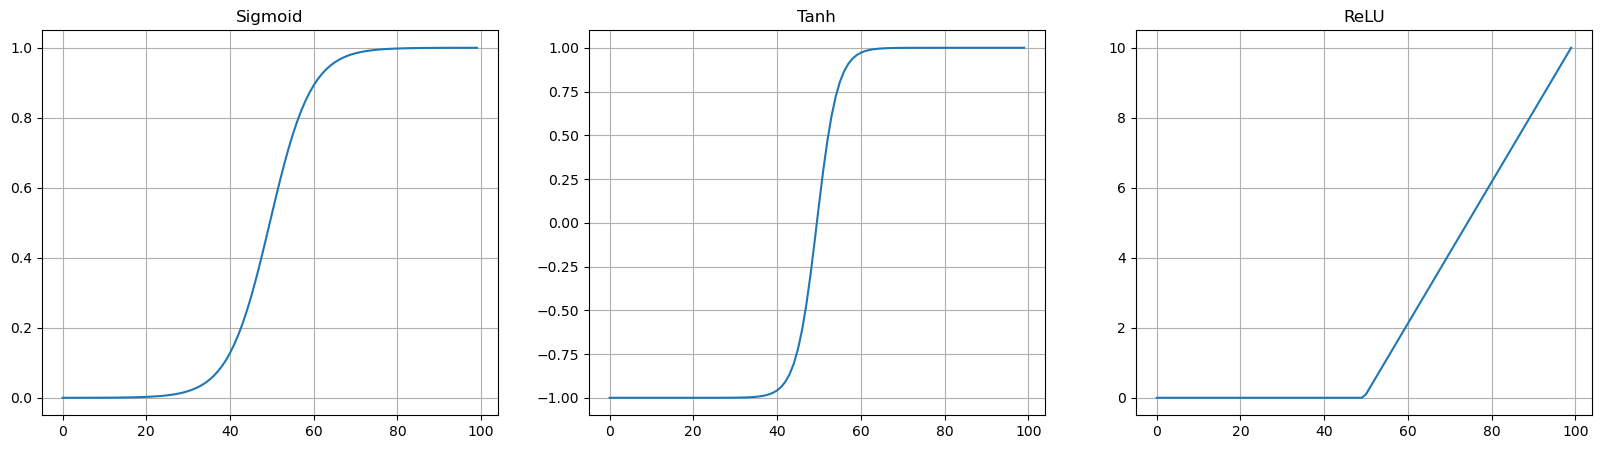

In [70]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))   # np.tanh

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)  # x ranges from -10 to 10 with 100 points

sig_x = sigmoid(x)
tanh_x = tanh(x)
relu_x = relu(x)


# 서브플롯 생성 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1x3 레이아웃

# 첫 번째 서브플롯
axes[0].plot(sig_x)
axes[0].set_title("Sigmoid")
axes[0].grid()

# 첫 번째 서브플롯
axes[1].plot(tanh_x)
axes[1].set_title("Tanh")
axes[1].grid()

# 첫 번째 서브플롯
axes[2].plot(relu_x)
axes[2].set_title("ReLU")
axes[2].grid()

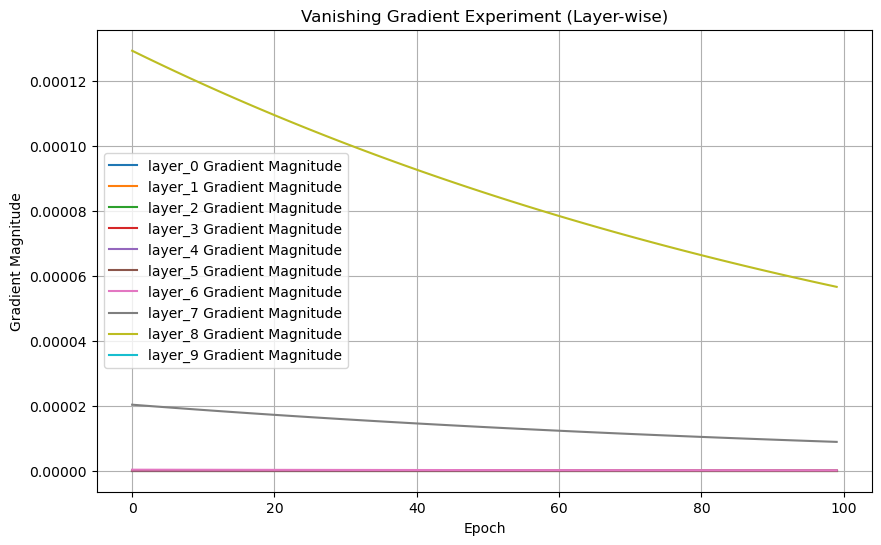

In [111]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 심층 신경망 정의
class DeepNet(nn.Module):
    def __init__(self, num_layers):
        super().__init__()
        self.layers = nn.ModuleList()
        
        # 9개의 레이어 정의
        for i in range(9):
            self.layers.append(nn.Linear(10, 10))  # 각 레이어는 10 -> 10
        
        self.output_layer = nn.Linear(10, 1)  # 마지막 출력 레이어
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
            # 123번: 활성화 함수 없음
            if i in [3, 4, 5]:  # 456번: ReLU
                x = self.relu(x)
            elif i in [6, 7, 8]:  # 789번: Sigmoid
                x = self.sigmoid(x)
        x = self.sigmoid(self.output_layer(x))  # 출력 레이어에는 Sigmoid
        return x



# 데이터 생성
x = torch.tensor(np.random.randn(1000, 10), dtype=torch.float32)  # 입력 크기: 10
y = torch.tensor(np.random.randint(0, 2, size=(1000, 1)), dtype=torch.float32)  # 이진 타깃

# 모델 정의 (깊이 10)
model = DeepNet(num_layers=10)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 그래디언트 추적용 딕셔너리
gradient_tracking = {f"layer_{i}": [] for i in range(10)}

# 학습 루프
for epoch in range(100):
    # 순전파
    outputs = model(x)
    loss = criterion(outputs, y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()

    # 각 레이어의 가중치 그래디언트 기록
    for i, layer in enumerate(model.layers):
        gradient_tracking[f"layer_{i}"].append(layer.weight.grad.abs().mean().item())

    # 가중치 업데이트
    optimizer.step()

# 그래디언트 크기 시각화
plt.figure(figsize=(10, 6))
for layer, grads in gradient_tracking.items():
    plt.plot(grads, label=f"{layer} Gradient Magnitude")

plt.title("Vanishing Gradient Experiment (Layer-wise)")
plt.xlabel("Epoch")
plt.ylabel("Gradient Magnitude")
plt.legend()
plt.grid()
plt.show()